In [2]:
!pip install scikit-learn==1.2.2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [3]:
data= pd.read_csv("C:/Users/JISNA/Downloads/fraud_detection.csv")

In [4]:
data

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,1,1,0,1,1,0,Laborers,1.0,2,2
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,1,1,0,1,1,0,Core staff,2.0,1,1
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,1,1,1,1,1,0,Laborers,1.0,2,2
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,1,1,0,1,0,0,Laborers,2.0,2,2
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,1,1,0,1,0,0,Core staff,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,...,1,1,0,1,0,0,Sales staff,1.0,1,1
307507,307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,...,1,0,0,1,1,0,NaN,1.0,2,2
307508,307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,...,1,1,0,1,0,1,Managers,1.0,3,3
307509,307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,...,1,1,0,1,0,0,Laborers,2.0,2,2


In [5]:
data.shape

(307511, 33)

In [6]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,1,1,0,1,1,0,Laborers,1.0,2,2
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,1,1,0,1,1,0,Core staff,2.0,1,1
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,1,1,1,1,1,0,Laborers,1.0,2,2
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,1,1,0,1,0,0,Laborers,2.0,2,2
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,1,1,0,1,0,0,Core staff,1.0,2,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   307511 non-null  int64  
 1   SK_ID_CURR                   307511 non-null  int64  
 2   TARGET                       307511 non-null  int64  
 3   NAME_CONTRACT_TYPE           307511 non-null  object 
 4   CODE_GENDER                  307511 non-null  object 
 5   FLAG_OWN_CAR                 307511 non-null  object 
 6   FLAG_OWN_REALTY              307511 non-null  object 
 7   CNT_CHILDREN                 307511 non-null  int64  
 8   AMT_INCOME_TOTAL             307511 non-null  float64
 9   AMT_CREDIT                   307511 non-null  float64
 10  AMT_ANNUITY                  307499 non-null  float64
 11  AMT_GOODS_PRICE              307233 non-null  float64
 12  NAME_TYPE_SUITE              306219 non-null  object 
 13 

In [8]:
data.values

array([[0, 100002, 1, ..., 1.0, 2, 2],
       [1, 100003, 0, ..., 2.0, 1, 1],
       [2, 100004, 0, ..., 1.0, 2, 2],
       ...,
       [307508, 456253, 0, ..., 1.0, 3, 3],
       [307509, 456254, 1, ..., 2.0, 2, 2],
       [307510, 456255, 0, ..., 2.0, 1, 1]], dtype=object)

In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().values.sum()

300904

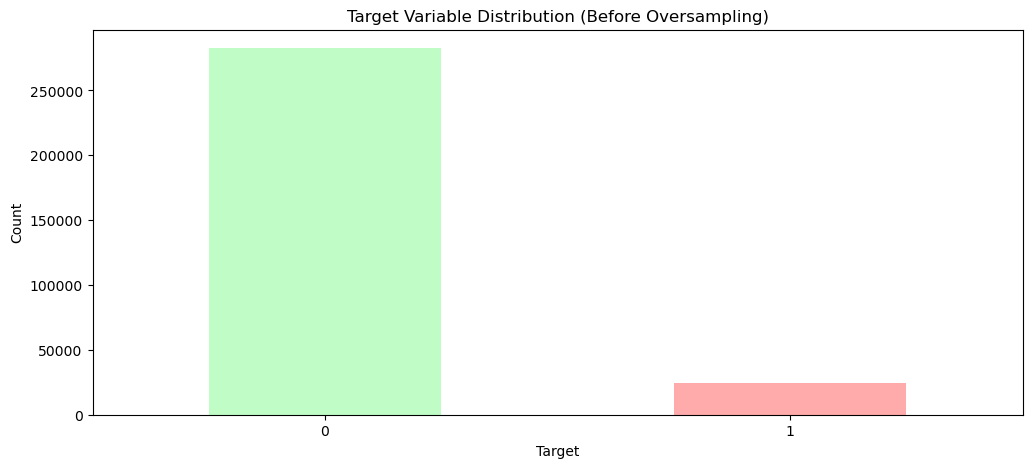

In [11]:
target_counts = data['TARGET'].value_counts()
plt.figure(figsize=(12, 5))
target_counts.plot(kind= 'bar', color=['#BFFCC6', '#FFABAB'])
plt.title('Target Variable Distribution (Before Oversampling)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [13]:
data = pd.get_dummies(data, columns=categorical_columns)

In [14]:
data

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,...,True,False,False,False,False,False,False,False,False,False
1,1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,...,False,False,False,False,False,False,False,False,False,False
2,2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,...,True,False,False,False,False,False,False,False,False,False
3,3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,...,True,False,False,False,False,False,False,False,False,False
4,4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,...,False,False,False,False,False,False,True,False,False,False
307507,307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,...,False,False,False,False,False,False,False,False,False,False
307508,307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,...,False,False,True,False,False,False,False,False,False,False
307509,307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,...,True,False,False,False,False,False,False,False,False,False


In [15]:
X = data.drop('TARGET', axis=1)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [16]:
X.shape

(307511, 81)

In [17]:
Y = data['TARGET']
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size =0.2,random_state =42)
smote = SMOTE(random_state = 42)
X_train_resampled,Y_train_resampled = smote.fit_resample(X_train,Y_train)


In [18]:
X_train_resampled.shape,Y_train_resampled.shape

((452264, 81), (452264,))

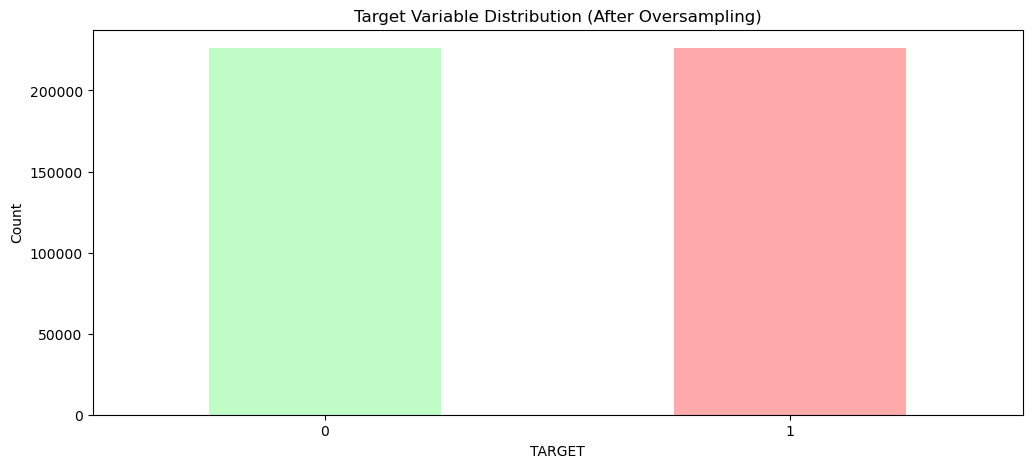

In [19]:
target_counts_resampled = Y_train_resampled.value_counts()
plt.figure(figsize=(12, 5))
target_counts_resampled.plot(kind= 'bar', color=['#BFFCC6', '#FFABAB'])
plt.title('Target Variable Distribution (After Oversampling)')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [20]:
Y_train.value_counts()

TARGET
0    226132
1     19876
Name: count, dtype: int64

In [21]:
Y_train_resampled.value_counts()

TARGET
0    226132
1    226132
Name: count, dtype: int64

In [22]:
print("No.of Records added : ", Y_train_resampled.shape[0] - Y_train.shape[0])

No.of Records added :  206256


In [23]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled,Y_train_resampled)
accuracy = clf.score(X_test, Y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9195161211648212


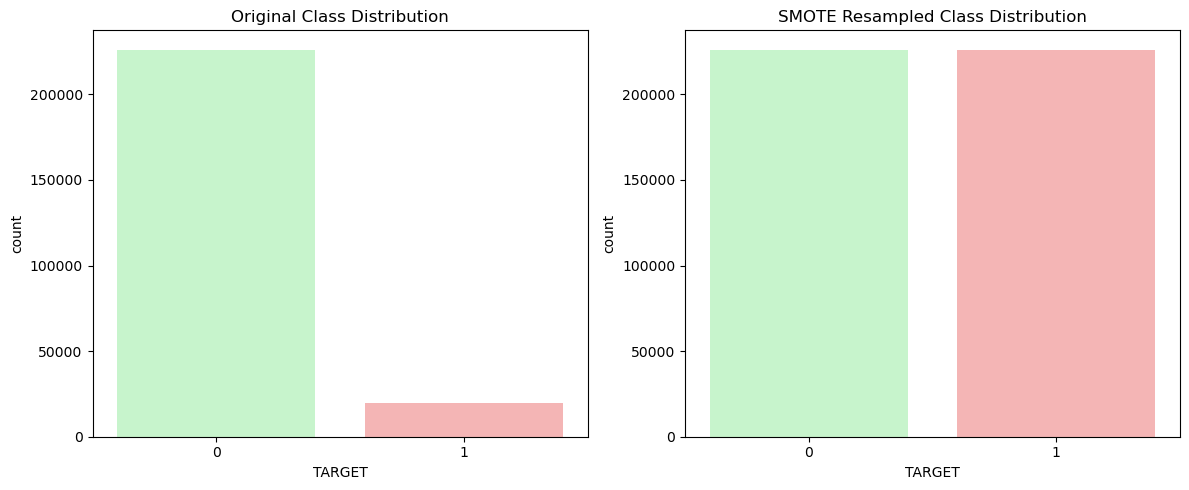

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
color = {0: "#BFFCC6", 1: "#FFABAB"}
sns.countplot(x=pd.Series(Y_train), palette=color)
plt.title('Original Class Distribution')
plt.subplot(1, 2, 2)
sns.countplot(x=pd.Series(Y_train_resampled), palette=color)
plt.title('SMOTE Resampled Class Distribution')
plt.tight_layout()
plt.show()